# Analisi tamponi

In [7]:
import matplotlib.pyplot as plt
from aidam.math_utils import moving_function_rev1

Calcolo le posizioni nella grid dei subplot dove mettere le figure delle varie regioni

In [8]:
grid_shape=(7,3)

posizioni=np.array(range(grid_shape[0]*grid_shape[1]))

posizioni=np.reshape(posizioni,grid_shape)

grid_cell={}
for r in range(grid_shape[0]):
    for c in range(grid_shape[1]):
        grid_cell[posizioni[r,c]]=(r,c)

## Tamponi effettuati

### Nazionale

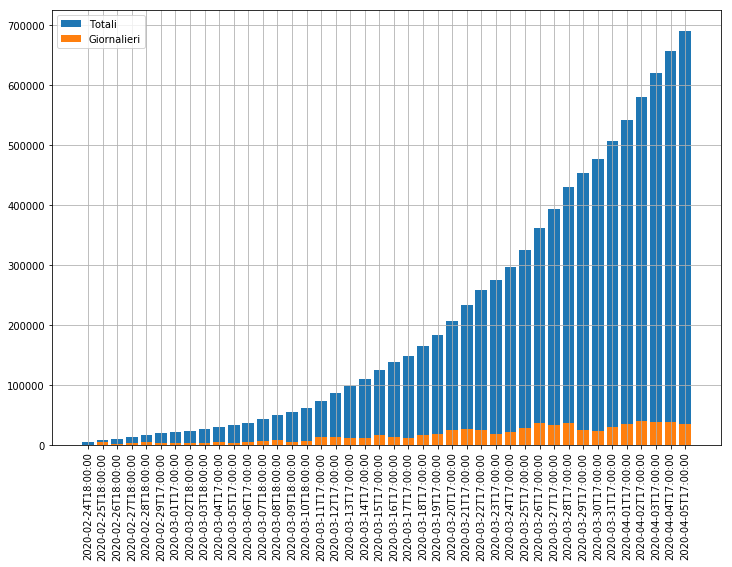

In [9]:
plt.figure(figsize=(12,8))

plt.bar(day_counter,trend['tamponi']['Italia'],label='Totali')
plt.bar(day_counter,trend['tamponi_giornalieri']['Italia'],label='Giornalieri')
plt.xticks(day_counter,giorni,rotation=90)
plt.grid()
plt.legend()
plt.show()

### Regionale

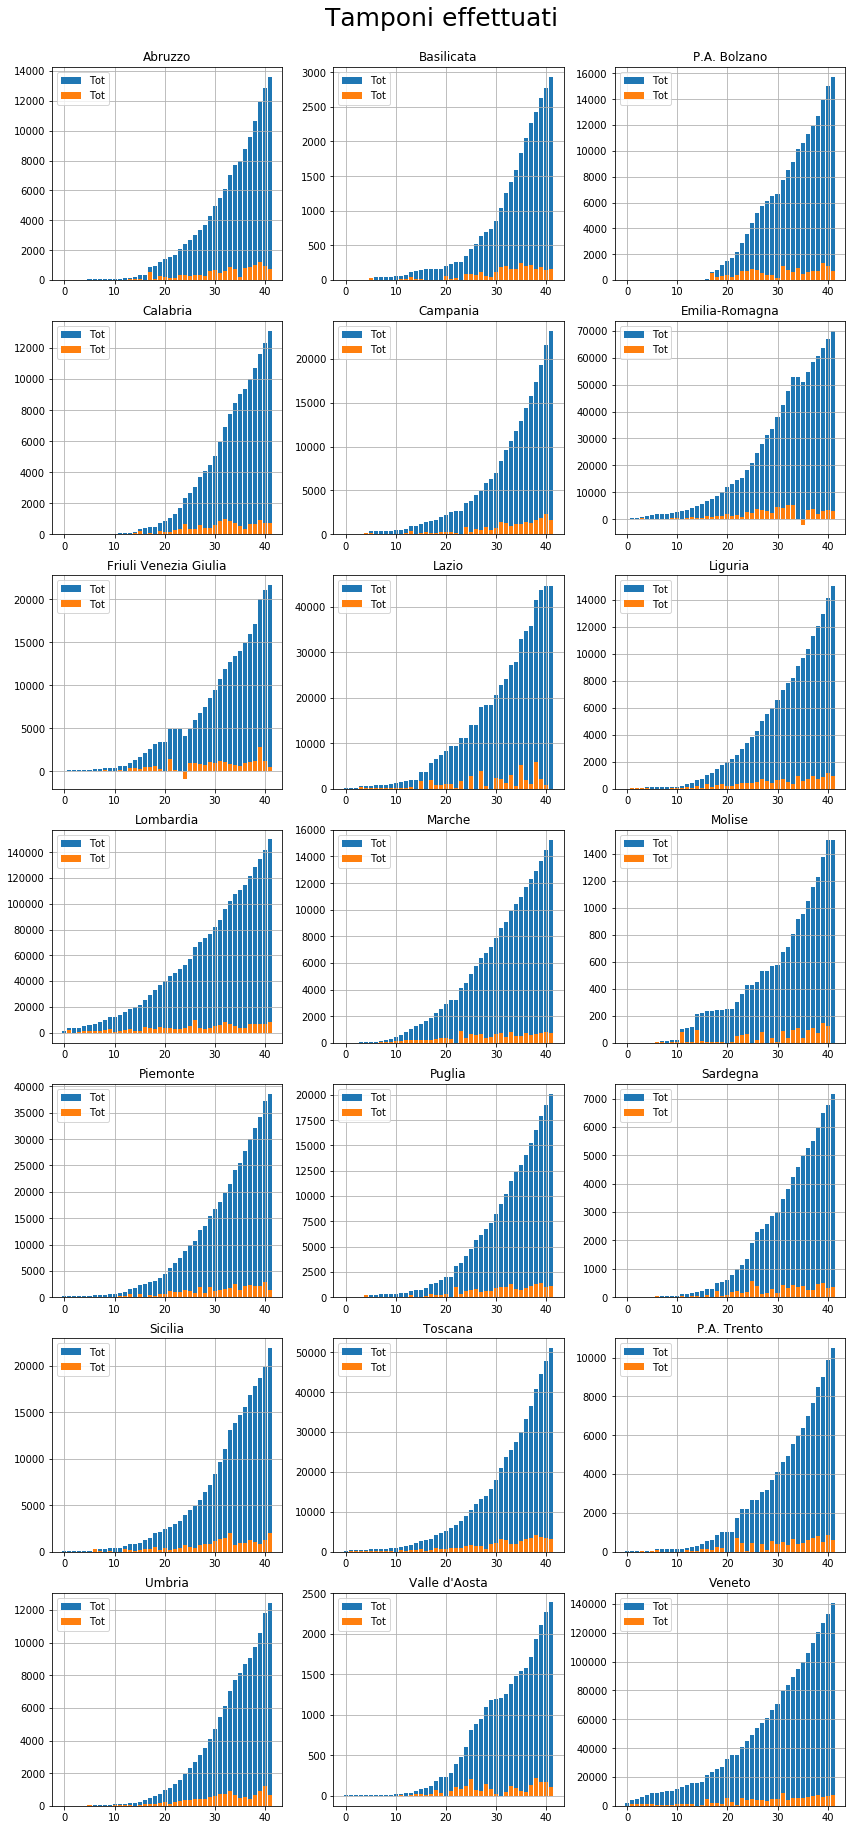

In [10]:
fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=(12,25))
fig.suptitle('Tamponi effettuati', y=1.02,fontsize=25)
fig.tight_layout(pad=2.0)

for i,regione in enumerate(regioni):
    ax[grid_cell[i][0],grid_cell[i][1]].bar(day_counter,trend['tamponi'][regione],label='Tot')
    ax[grid_cell[i][0],grid_cell[i][1]].bar(day_counter,trend['tamponi_giornalieri'][regione],label='Tot')
    ax[grid_cell[i][0],grid_cell[i][1]].set_title(regione)
    ax[grid_cell[i][0],grid_cell[i][1]].legend()
    ax[grid_cell[i][0],grid_cell[i][1]].grid()

## Percentuale tamponi positivi

### Nazionale nel tempo

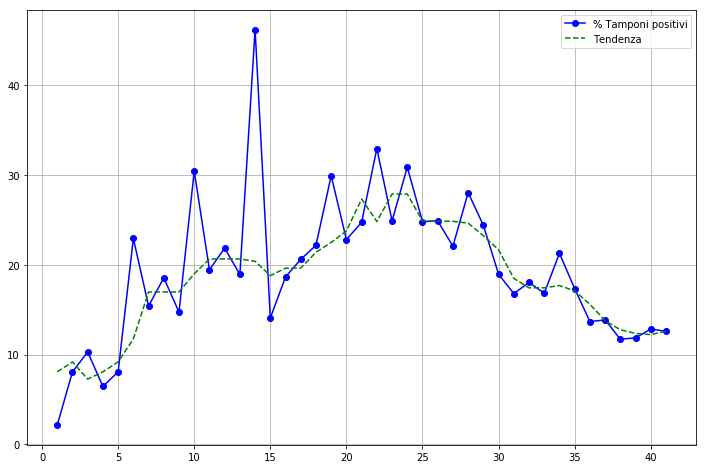

In [11]:
plt.figure(figsize=(12,8))
plt.plot(day_counter,trend['perc_tamponi_positivi']['Italia'],
         'bo-',
         label='% Tamponi positivi')
# metto anche la versione lisciata
plt.plot(day_counter,moving_function_rev1(trend['perc_tamponi_positivi']['Italia'],np.median,2,1),
         'g--',
         label='Tendenza')
plt.grid()
plt.legend()
plt.show()

### Regionale nel tempo

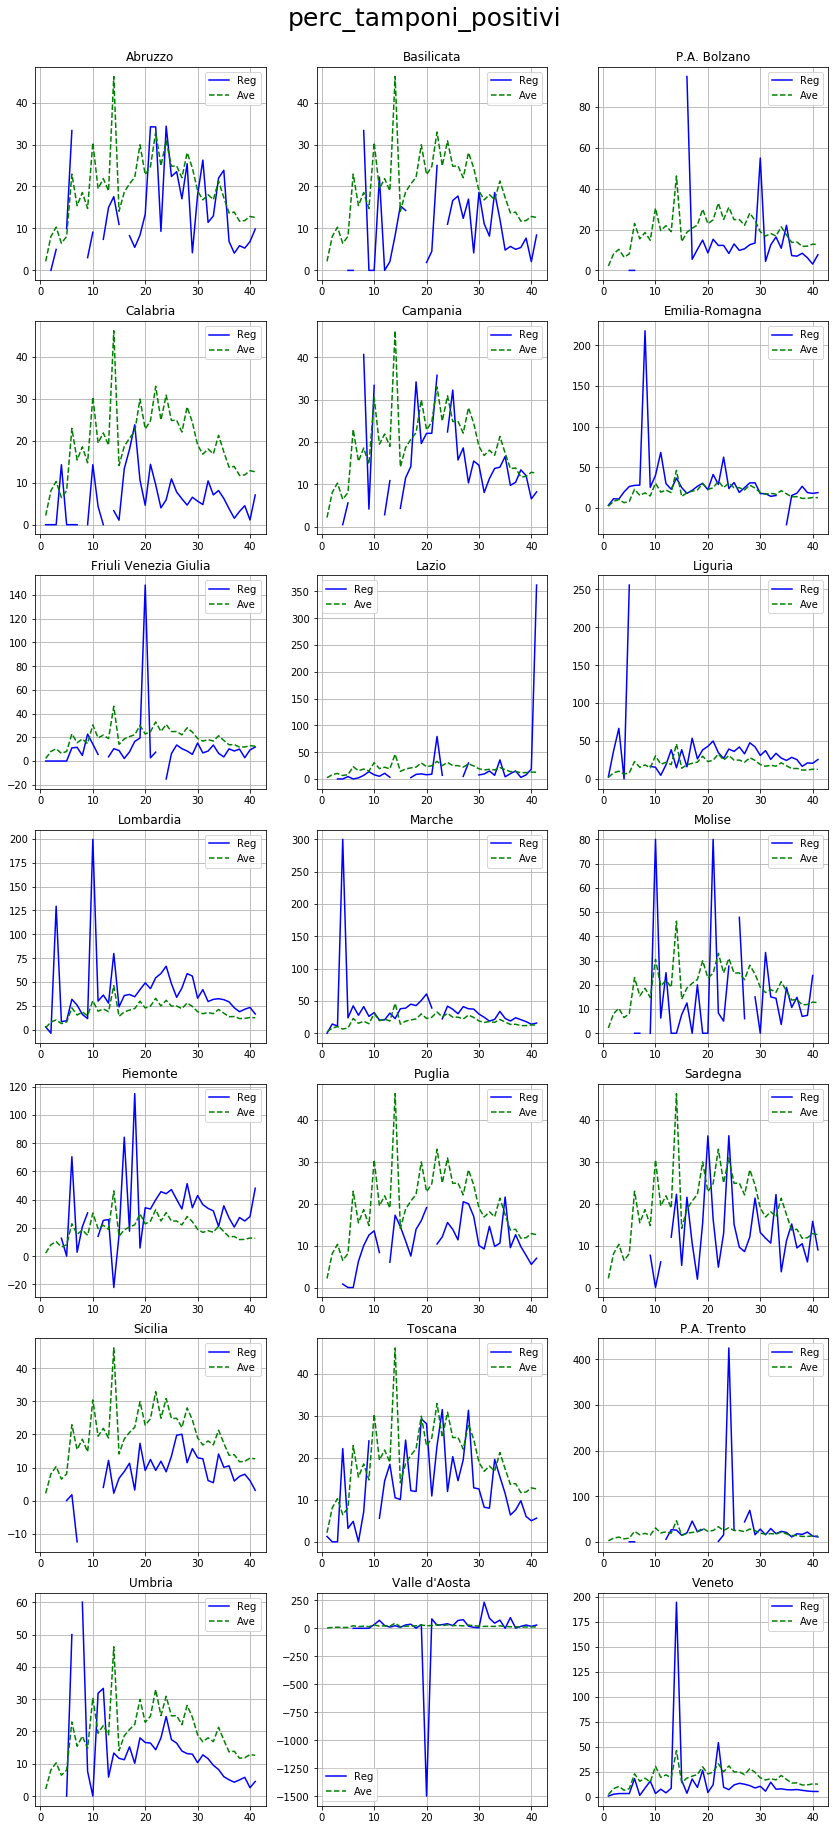

In [12]:
# percentuale tamponi positivi nel tempo nelle varie regioni

indicatori_selected=['perc_tamponi_positivi']

for indicatore in indicatori_selected:

    fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=(12,25))
    fig.suptitle(indicatore, y=1.02,fontsize=25)
    fig.tight_layout(pad=2.0)

    for i,regione in enumerate(regioni):
        ax[grid_cell[i][0],grid_cell[i][1]].plot(day_counter,trend[indicatore][regione],'b-',label='Reg')
        ax[grid_cell[i][0],grid_cell[i][1]].set_title(regione)
        # plotto anche media italiana
        ax[grid_cell[i][0],grid_cell[i][1]].plot(day_counter,trend[indicatore]['Italia'],'g--',label='Ave')
        ax[grid_cell[i][0],grid_cell[i][1]].legend()
        ax[grid_cell[i][0],grid_cell[i][1]].grid()

### Percentuale tamponi positivi nelle varie regioni

#### Odierna (media ultimi 3 giorni)

**Media** dei tamponi positivi in percentuale su quelli effettuati negli ultimi (3) giorni nelle varie regioni.

In [15]:
actual_perc_pos=[np.nanmean(trend['perc_tamponi_positivi'][r][-3:]) for r in regioni]

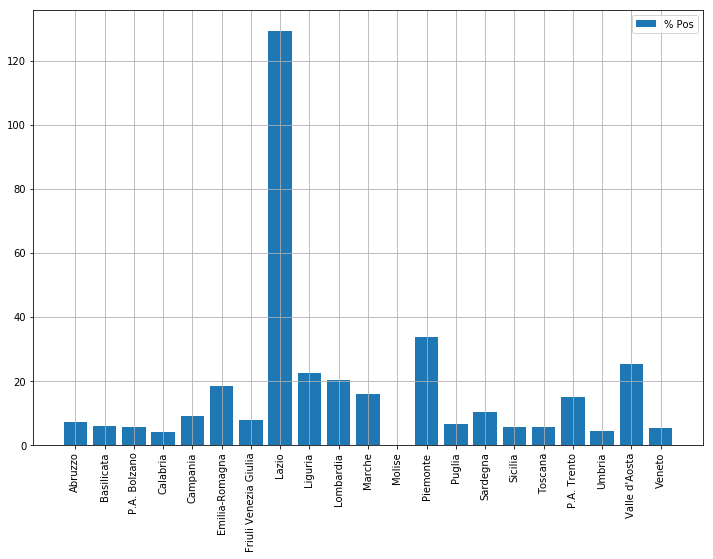

In [16]:
plt.figure(figsize=(12,8))
plt.bar(range(len(regioni)),actual_perc_pos,label='% Pos')
plt.xticks(range(len(regioni)),regioni,rotation=90)
plt.grid()
plt.legend()
plt.show()